In [169]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import json 
import matplotlib.pyplot as plt 
import pickle 

from ast import literal_eval

In [170]:
from wordcloud import WordCloud

In [171]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [172]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_c87fd03390bd404a84ebf19568214a0e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='1I7YYV-ShnNcOrPubl6IWtBmNpL086p8xiNXBqrzwAWx',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_c87fd03390bd404a84ebf19568214a0e.get_object(Bucket='movie-donotdelete-pr-uvsezvyxodrqlg',Key='tmdb_5000_credits.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

credits= pd.read_csv(body)
credits.head()


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [173]:

body = client_c87fd03390bd404a84ebf19568214a0e.get_object(Bucket='movie-donotdelete-pr-uvsezvyxodrqlg',Key='tmdb_5000_movies.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

movies_df = pd.read_csv(body)
movies_df.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [174]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [175]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [176]:
credits.tail()

,movie_id,title,cast,crew
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."
4802,25975,My Date with Drew,"[{""cast_id"": 3, ""character"": ""Herself"", ""credi...","[{""credit_id"": ""58ce021b9251415a390165d9"", ""de..."


In [177]:
print("credits:",credits.columns)
print("movies_df:",movies_df.columns)

credits: Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')
movies_df: Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


In [178]:
print("credits:",credits.shape)
print("movies_df:",movies_df.shape)

credits: (4803, 4)
movies_df: (4803, 20)


In [179]:
credits_column_renamed=credits.rename(index=str,columns={"movie_id":"id"})
movies=movies_df.merge(credits_column_renamed,on="id")

In [180]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [181]:
movies.shape

(4803, 23)

In [182]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [183]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [184]:
# changing the crew column from json to string    
movies['crew'] = movies['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
movies['crew'] = movies['crew'].apply(director)
movies.rename(columns={'crew':'director'},inplace=True)

In [185]:
from ast import literal_eval
features = ['keywords','genres']
for feature in features:
    movies[feature] = movies[feature].apply(literal_eval)

In [186]:
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 1:
            names = names[:1]
        return names

    
    return []

In [187]:
features = ['keywords', 'genres']
for feature in features:
    movies[feature] = movies[feature].apply(get_list)

In [188]:
print (type(movies.loc[0, 'genres']))

<class 'list'>


In [189]:
movies['genres']

0            [Action]
1         [Adventure]
2            [Action]
3            [Action]
4            [Action]
            ...      
4798         [Action]
4799         [Comedy]
4800         [Comedy]
4801               []
4802    [Documentary]
Name: genres, Length: 4803, dtype: object

In [190]:
movies['genres']  = movies['genres'] .str.join(', ')

In [191]:
movies['genres'] 

0            Action
1         Adventure
2            Action
3            Action
4            Action
           ...     
4798         Action
4799         Comedy
4800         Comedy
4801               
4802    Documentary
Name: genres, Length: 4803, dtype: object

In [192]:
movies.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,-0.089377,0.505414,0.730823,0.269851,0.093146,0.593180
id,-0.089377,1.000000,0.031202,-0.050425,-0.153536,-0.270595,-0.004128
popularity,0.505414,0.031202,1.000000,0.644724,0.225502,0.273952,0.778130
revenue,0.730823,-0.050425,0.644724,1.000000,0.251093,0.197150,0.781487
runtime,0.269851,-0.153536,0.225502,0.251093,1.000000,0.375046,0.271944
vote_average,0.093146,-0.270595,0.273952,0.197150,0.375046,1.000000,0.312997
vote_count,0.593180,-0.004128,0.778130,0.781487,0.271944,0.312997,1.000000


In [193]:
movies.isnull().any()

budget                  False
genres                  False
homepage                 True
id                      False
keywords                False
original_language       False
original_title          False
overview                 True
popularity              False
production_companies    False
production_countries    False
release_date             True
revenue                 False
runtime                  True
spoken_languages        False
status                  False
tagline                  True
title_x                 False
vote_average            False
vote_count              False
title_y                 False
cast                    False
director                 True
dtype: bool

In [194]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
director                  30
dtype: int64

<AxesSubplot:>

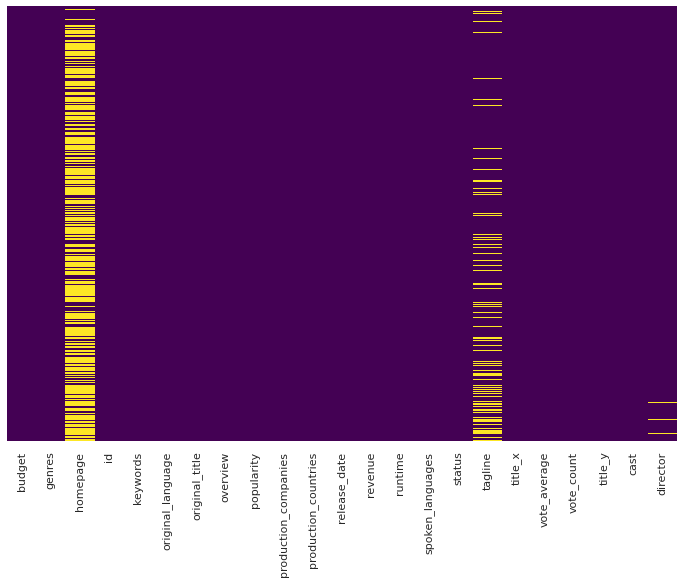

In [195]:
sns.heatmap(movies.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [196]:
movies = movies.dropna(subset = ['director','runtime'])

In [197]:
movies["revenue"]=movies["revenue"].floordiv(1000000)
movies["budget"]=movies["budget"].floordiv(1000000)

In [198]:
movies = movies[movies['budget'] != 0]

In [199]:
movies['release_date'] = pd.DataFrame(pd.to_datetime(movies['release_date'],dayfirst=True))
movies['release_month'] = movies['release_date'].dt.month
movies['release_DOW'] = movies['release_date'].dt.dayofweek

Text(0.5, 1.0, 'Boxplot of Runtime')

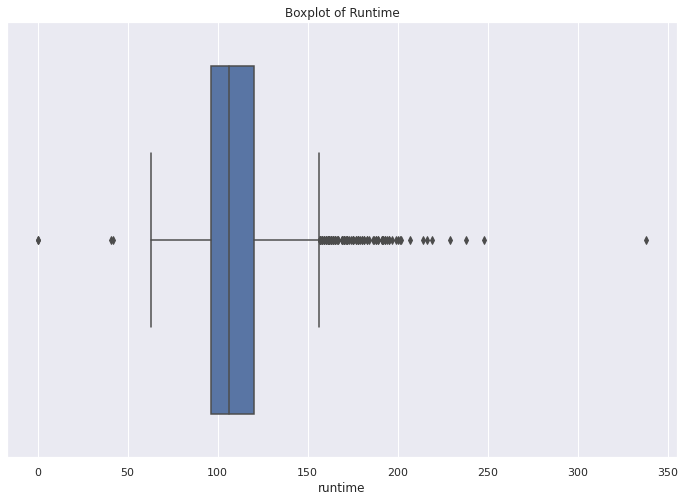

In [200]:
sns.boxplot(x=movies['runtime'])
plt.title('Boxplot of Runtime')

Text(0.5, 1.0, 'Boxplot of Revenue')

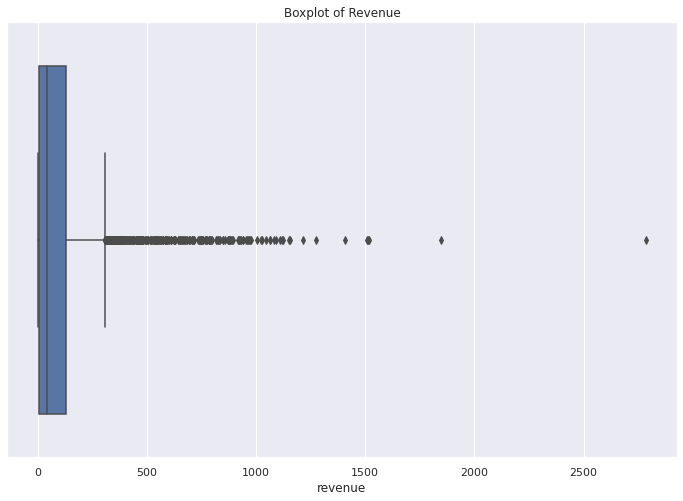

In [201]:
sns.boxplot(x=movies['revenue'])
plt.title('Boxplot of Revenue')

Text(0.5, 1.0, 'Boxplot of Budget')

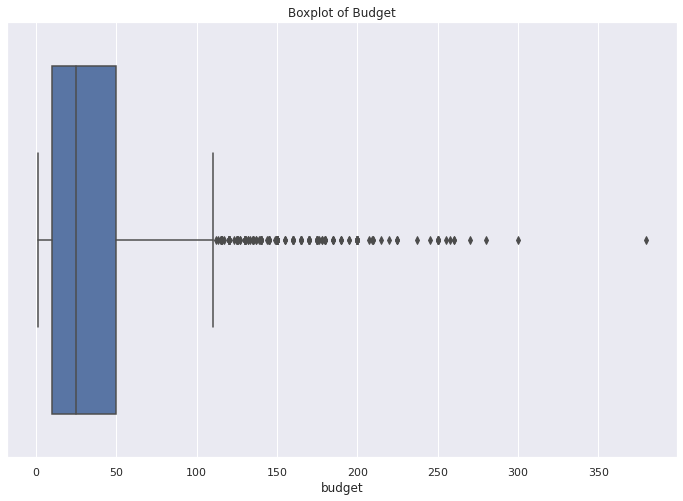

In [202]:
sns.boxplot(x=movies['budget'])
plt.title('Boxplot of Budget')

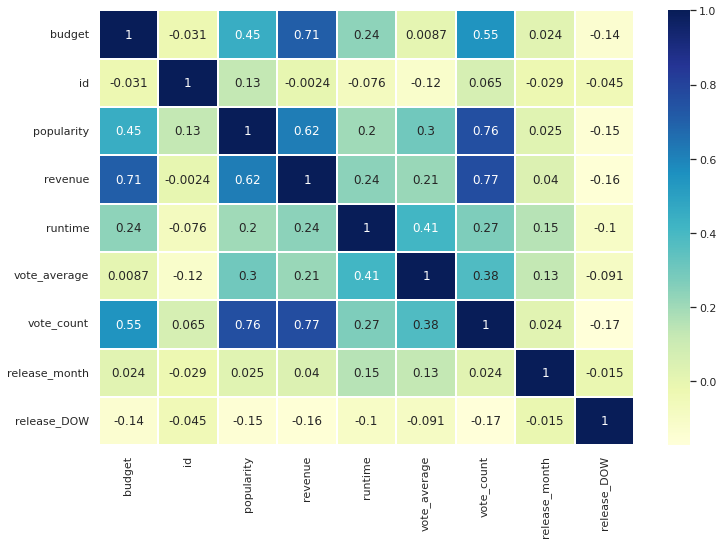

In [203]:
sns.heatmap(movies.corr(), cmap='YlGnBu', annot=True, linewidths = 0.2);

In [204]:
movies['log_revenue'] = np.log1p(movies['revenue']) 
movies['log_budget'] = np.log1p(movies['budget'])

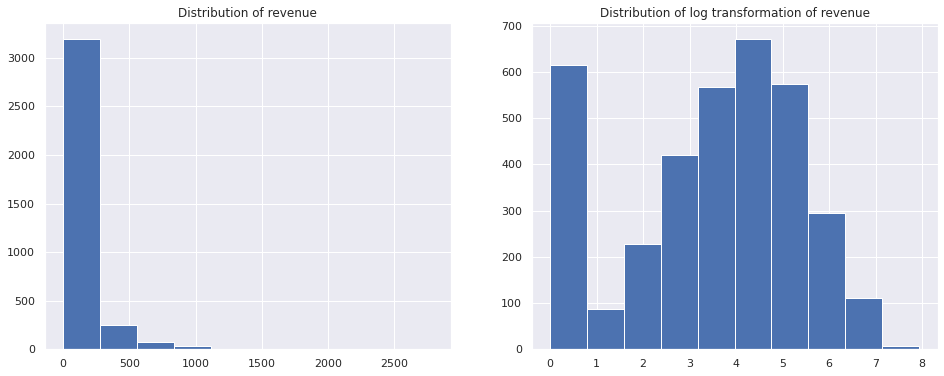

In [205]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1) 
plt.hist(movies['revenue']);
plt.title('Distribution of revenue');
plt.subplot(1, 2, 2)
plt.hist(movies['log_revenue']);
plt.title('Distribution of log transformation of revenue');

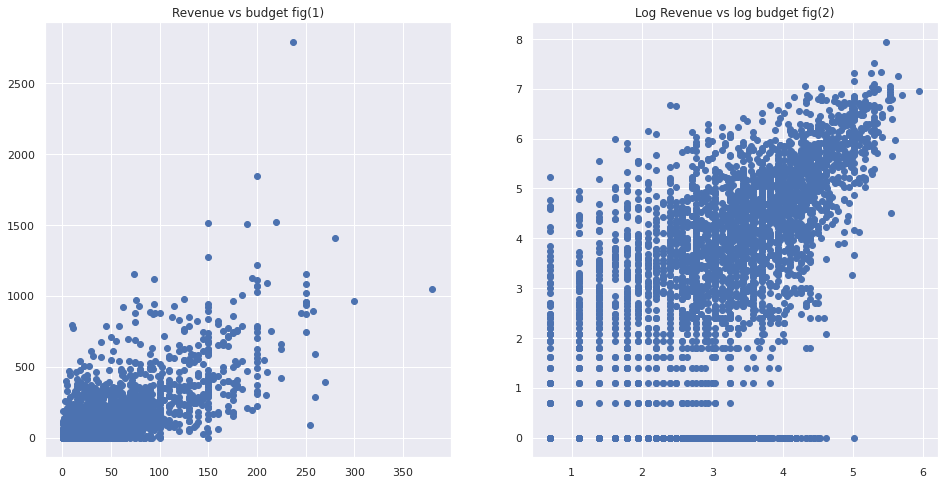

In [206]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(movies['budget'], movies['revenue'])
plt.title('Revenue vs budget fig(1)');
plt.subplot(1, 2, 2)
plt.scatter(movies['log_budget'], movies['log_revenue'])
plt.title('Log Revenue vs log budget fig(2)');

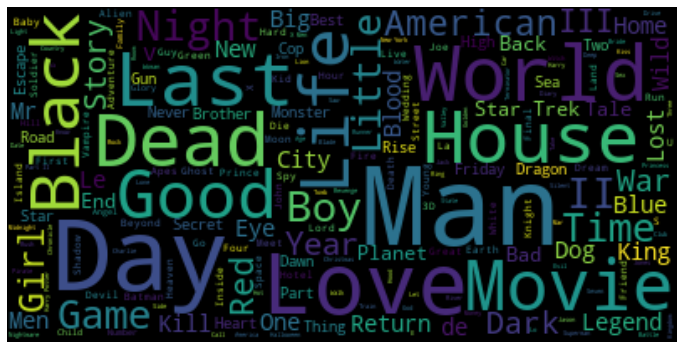

In [207]:
wordcloud = WordCloud().generate(movies.original_title.to_string())

sns.set(rc={'figure.figsize':(12,8)})

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

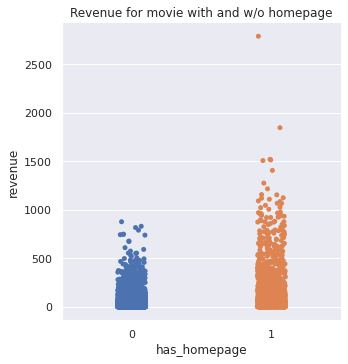

In [208]:
movies['has_homepage'] = 0
movies.loc[movies['homepage'].isnull() == False, 'has_homepage'] = 1 

sns.catplot(x='has_homepage', y='revenue', data=movies);
plt.title('Revenue for movie with and w/o homepage');

Text(0.5, 1.0, 'revenue')

<Figure size 1080x576 with 0 Axes>

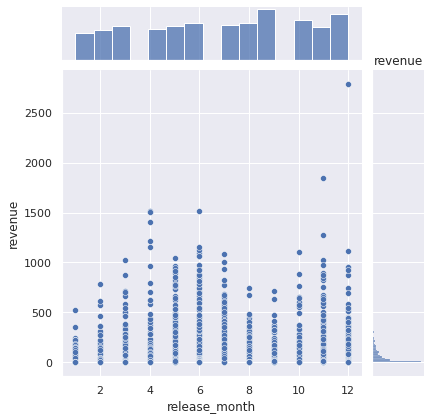

In [209]:
plt.figure(figsize=(15,8))
sns.jointplot(movies.release_month, movies.revenue);
plt.xticks(rotation=90)
plt.xlabel('Months')
plt.title('revenue')

In [210]:
movies_box = movies.drop(['homepage','id','keywords','original_language','original_title','overview','production_companies',
                     'production_countries','release_date','spoken_languages','status','tagline',
                     'title_x','title_y','cast','log_revenue','log_budget','has_homepage'],axis = 1)

In [211]:
movies_box.isnull().sum()

budget           0
genres           0
popularity       0
revenue          0
runtime          0
vote_average     0
vote_count       0
director         0
release_month    0
release_DOW      0
dtype: int64

In [212]:
movies_box.dtypes

budget             int64
genres            object
popularity       float64
revenue            int64
runtime          float64
vote_average     float64
vote_count         int64
director          object
release_month      int64
release_DOW        int64
dtype: object

In [213]:
type(movies_box)

pandas.core.frame.DataFrame

In [214]:
movies_box.head()

,budget,genres,popularity,revenue,runtime,vote_average,vote_count,director,release_month,release_DOW
0,237,Action,150.437577,2787,162.0,7.2,11800,James Cameron,12,3
1,300,Adventure,139.082615,961,169.0,6.9,4500,Gore Verbinski,5,5
2,245,Action,107.376788,880,148.0,6.3,4466,Sam Mendes,10,0
3,250,Action,112.312950,1084,165.0,7.6,9106,Christopher Nolan,7,0
4,260,Action,43.926995,284,132.0,6.1,2124,Andrew Stanton,3,2


In [215]:
# Label encoding features to change categorical variables into numerical one
from sklearn.preprocessing import LabelEncoder
from collections import Counter as c
cat=['director','genres']
for i in movies_box[cat]:#looping through all the categorical columns
    print("LABEL ENCODING OF:",i)
    LE = LabelEncoder()#creating an object of LabelEncoder
    print(c(movies_box[i])) #getting the classes values before transformation
    movies_box[i] = LE.fit_transform(movies_box[i]) # trannsforming our text classes to numerical values
    print(c(movies_box[i])) #getting the classes values after transformation

LABEL ENCODING OF: director
Counter({'Steven Spielberg': 27, 'Clint Eastwood': 19, 'Ridley Scott': 16, 'Martin Scorsese': 16, 'Woody Allen': 16, 'Steven Soderbergh': 15, 'Renny Harlin': 15, 'Robert Rodriguez': 15, 'Tim Burton': 14, 'Oliver Stone': 14, 'Robert Zemeckis': 13, 'Michael Bay': 12, 'Ron Howard': 12, 'Joel Schumacher': 12, 'Tony Scott': 12, 'Brian De Palma': 12, 'Francis Ford Coppola': 12, 'Barry Levinson': 11, 'Bobby Farrelly': 11, 'David Fincher': 10, 'Shawn Levy': 10, 'Richard Donner': 10, 'Chris Columbus': 10, 'Paul W.S. Anderson': 10, 'Rob Reiner': 10, 'Joel Coen': 10, 'Wes Craven': 10, 'Kevin Smith': 10, 'Richard Linklater': 10, 'Sam Raimi': 9, 'Peter Jackson': 9, 'Rob Cohen': 9, 'M. Night Shyamalan': 9, 'John McTiernan': 9, 'Spike Lee': 9, 'John Carpenter': 9, 'Christopher Nolan': 8, 'Bryan Singer': 8, 'Brett Ratner': 8, 'Martin Campbell': 8, 'Roland Emmerich': 8, 'Quentin Tarantino': 8, 'Simon West': 8, 'Dennis Dugan': 8, 'Adam Shankman': 8, 'F. Gary Gray': 8, 'Antoin

In [216]:
mapping_dict ={} 
category_col=["director","genres"]
for col in category_col: 
    LE_name_mapping = dict(zip(LE.classes_, 
                        LE.transform(LE.classes_))) 
  
    mapping_dict[col]= LE_name_mapping 
    print(mapping_dict)

{'director': {'Action': 0, 'Adventure': 1, 'Animation': 2, 'Comedy': 3, 'Crime': 4, 'Documentary': 5, 'Drama': 6, 'Family': 7, 'Fantasy': 8, 'History': 9, 'Horror': 10, 'Music': 11, 'Mystery': 12, 'Romance': 13, 'Science Fiction': 14, 'TV Movie': 15, 'Thriller': 16, 'War': 17, 'Western': 18}}
{'director': {'Action': 0, 'Adventure': 1, 'Animation': 2, 'Comedy': 3, 'Crime': 4, 'Documentary': 5, 'Drama': 6, 'Family': 7, 'Fantasy': 8, 'History': 9, 'Horror': 10, 'Music': 11, 'Mystery': 12, 'Romance': 13, 'Science Fiction': 14, 'TV Movie': 15, 'Thriller': 16, 'War': 17, 'Western': 18}, 'genres': {'Action': 0, 'Adventure': 1, 'Animation': 2, 'Comedy': 3, 'Crime': 4, 'Documentary': 5, 'Drama': 6, 'Family': 7, 'Fantasy': 8, 'History': 9, 'Horror': 10, 'Music': 11, 'Mystery': 12, 'Romance': 13, 'Science Fiction': 14, 'TV Movie': 15, 'Thriller': 16, 'War': 17, 'Western': 18}}


In [217]:
x=movies_box.iloc[:,[0,1,2,4,5,6,7,8,9]]
x=pd.DataFrame(x,columns=['budget','genres','popularity','runtime','vote_average','vote_count','director'
                          ,'release_month','release_DOW'])
x


,budget,genres,popularity,runtime,vote_average,vote_count,director,release_month,release_DOW
0,237,0,150.437577,162.0,7.2,11800,616,12,3
1,300,1,139.082615,169.0,6.9,4500,536,5,5
2,245,0,107.376788,148.0,6.3,4466,1345,10,0
3,250,0,112.312950,165.0,7.6,9106,245,7,0
4,260,0,43.926995,132.0,6.1,2124,65,3,2
...,...,...,...,...,...,...,...,...,...
4586,35,3,38.100488,99.0,5.8,923,1534,5,2
4596,6,10,19.331884,89.0,6.0,316,468,12,2
4682,13,10,4.009379,95.0,4.6,24,446,1,4
4720,8,6,9.452808,120.0,6.5,178,1085,9,4


In [218]:
y=movies_box.iloc[:,3]
y=pd.DataFrame(y,columns=['revenue'])
y

,revenue
0,2787
1,961
2,880
3,1084
4,284
...,...
4586,170
4596,0
4682,0
4720,15


In [219]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)
x

array([[ 4.6119201 , -1.10962   ,  3.53184628, ..., -0.46236379,
         1.48974933, -0.11265796],
       [ 6.07901328, -0.88369987,  3.20720932, ..., -0.63226827,
        -0.57429457,  1.39493336],
       [ 4.79821765, -1.10962   ,  2.30074366, ...,  1.08589076,
         0.9000225 , -2.37404493],
       ...,
       [-0.60441118,  1.14958124, -0.65451776, ..., -0.82341081,
        -1.75374823,  0.6411377 ],
       [-0.72084715,  0.24590074, -0.4988908 , ...,  0.53370121,
         0.60515909,  0.6411377 ],
       [-0.81399592,  2.50510198,  0.02172764, ...,  1.62746128,
        -1.1640214 ,  1.39493336]])

In [220]:
pickle.dump(sc,open("scalar_movies.pkl","wb"))

In [221]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [222]:
from sklearn.linear_model import LinearRegression
mr=LinearRegression()
mr.fit(x_train,y_train)

LinearRegression()

In [223]:
x_test

array([[ 0.02434304, -0.43185963,  0.08863398, ..., -0.72783954,
         0.31029567,  0.6411377 ],
       [ 0.02434304,  0.24590074, -0.46284717, ..., -0.43687812,
         1.48974933, -1.62024927],
       [-0.62769838,  0.24590074,  0.01199324, ...,  0.64201531,
        -1.45888481, -0.11265796],
       ...,
       [ 0.39693813, -1.10962   ,  0.24511761, ..., -1.75576163,
        -1.1640214 ,  0.6411377 ],
       [-0.69755995,  2.50510198, -0.57822433, ..., -0.86163932,
         1.19488592,  0.6411377 ],
       [ 1.14212831, -0.88369987,  0.37839529, ...,  1.38959501,
         0.31029567,  0.6411377 ]])

In [224]:
y_test[0:5]

,revenue
1045,95
1974,0
2883,12
117,474
3074,3


In [225]:
y_pred_mr=mr.predict(x_test)
y_pred_mr[0:5]

array([[9.84737546e+01],
       [1.02323905e+02],
       [5.61664235e+01],
       [4.87424644e+02],
       [3.41534770e-01]])

In [226]:
3.76955224*100000000

376955224.0

In [227]:
y_test

,revenue
1045,95
1974,0
2883,12
117,474
3074,3
...,...
3949,11
252,227
807,113
3209,0


In [228]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred_mr))
print("RMSE:",np.sqrt(metrics.mean_absolute_error(y_test,y_pred_mr)))

MAE: 56.52764663167958
RMSE: 7.518486990856577


In [229]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_mr)

0.7174505906933415

In [230]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs = -1, random_state = 42)
rf.fit(x_train,y_train)
y_pred_mr=mr.predict(x_test)
r2_score(y_test,y_pred_mr)

/tmp/wsuser/ipykernel_163/2698364770.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


0.7174505906933415

In [231]:
import pickle
pickle.dump(mr,open("model_movies.pkl","wb"))

In [232]:
model=pickle.load(open("model_movies.pkl","rb"))
scalar=pickle.load(open("scalar_movies.pkl","rb"))

In [233]:
input=[[50,8,20.239061,88,5,366,719,7,3]]
input=scalar.transform(input)
prediction = model.predict(input)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [234]:
prediction

array([[88.42348926]])

In [235]:
mr.score(x_test,y_test)

0.7174505906933415

In [236]:
!pip install -U ibm-watson-machine-learning


In [237]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

In [238]:
wml_credentials={"apikey":"AsEsgpTJTlp2mmXGHzecK7Zbt8j_hRpabb4IKeU_4jLr","url":"https://us-south.ml.cloud.ibm.com"}

In [239]:
wml_clients=APIClient(wml_credentials)
wml_clients.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ----  ------------------------
ID                                    NAME  CREATED
697b5af3-d565-4082-8db1-28cf799b8301  film  2022-10-27T07:24:11.546Z
------------------------------------  ----  ------------------------


In [240]:
def guid_from_space_name(wml_clients,space_name):
    space = wml_clients.spaces.get_details()
    print(space)
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [241]:
space_uid = guid_from_space_name(wml_clients,'film')
print(space_uid)

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/2a32b14979ac40689f618ad67a39a2e5:0d31f537-b3e5-4cf5-8bcf-1a43a2f19587::', 'guid': '0d31f537-b3e5-4cf5-8bcf-1a43a2f19587', 'name': 'Watson Machine Learning-sq', 'type': 'machine_learning'}], 'description': '', 'name': 'film', 'scope': {'bss_account_id': '2a32b14979ac40689f618ad67a39a2e5'}, 'stage': {'production': False}, 'status': {'state': 'active'}, 'storage': {'properties': {'bucket_name': 'da564821-cdf2-43f0-86e0-1fc1a2288f2b', 'bucket_region': 'us-south', 'credentials': {'admin': {'access_key_id': '9429dbe7c0124998a171f63066e1fc5d', 'api_key': '42YgKNic_W1HIz0lITK-Q8kVNl1OX1oq0aHnC_AYcB7G', 'secret_access_key': 'd56c7d8d6c26e7fcca14c88399153db598100485fd0bbb0c', 'service_id': 'ServiceId-c1437a0c-1554-4fa4-9252-13f43dbf6214'}, 'editor': {'access_key_id': '821720938354440c885c1d361484acc7', 'api_key': 'U2IBq_2WwvpbhgDo8UXMlpW_Gh3XfddT3yUu7nGPenGv', 'resource_key_crn': 'crn:v1:bluemix:public:cloud-o

In [242]:
wml_clients.set.default_space(space_uid)

'SUCCESS'

In [243]:
wml_clients.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [244]:
software_spec_uid = wml_clients.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [245]:
import sklearn
sklearn.__version__

'1.0.2'

In [248]:
model_details = wml_clients.repository.store_model(model=mr,meta_props={
    wml_clients.repository.ModelMetaNames.NAME:"Movie_box_office_model_1",
    wml_clients.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
    wml_clients.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid})
    
model_id = wml_clients.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/repository.py:1453: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


In [249]:
model_id

'72f22afd-5d7d-487b-98ea-db1e87145ed2'